In [15]:
# Устанавливаем пакеты  topGO и ALL, hgu95av2.db
if (!requireNamespace(c("ALL", "topGO", "hgu95av2.db"), quietly = TRUE)) {
    BiocManager::install("topGO")
    BiocManager::install("ALL")
    BiocManager::install("hgu95av2.db")
}

In [16]:
# Подключаем пакеты и получаем данные
library(topGO)
library(ALL)
library(hgu95av2.db)

data(ALL)
data(geneList)

Loading required package: org.Hs.eg.db







In [17]:
# Это наш датасет с лейкемией
ALL

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 128 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 01005 01010 ... LAL4 (128 total)
  varLabels: cod diagnosis ... date last seen (21 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 14684422 16243790 
Annotation: hgu95av2 

In [18]:
Biobase::exprs(ALL)[1:5, 1:5]

,01005,01010,03002,04006,04007
1000_at,7.597323,7.479445,7.567593,7.384684,7.905312
1001_at,5.046194,4.932537,4.799294,4.922627,4.844565
1002_f_at,3.900466,4.208155,3.886169,4.206798,3.416923
1003_s_at,5.903856,6.169024,5.860459,6.116890,5.687997
1004_at,5.925260,5.912780,5.893209,6.170245,5.615210


In [20]:
# Взглянем по подробнее на наш список генов, который мы загрузили из пакета ALL
# У этого вектора в имене стоит название гена
# А значение - это pvalue
head(geneList)

1095_s_at   1130_at   1196_at 1329_s_at 1340_s_at 1342_g_at 
1.0000000 1.0000000 0.6223795 0.5412240 1.0000000 1.0000000

In [23]:
# С помощью функции topDiffGenes мы можем отсечь незначительно меняющиеся гены
# Как мы видим, всего значимых генов 50 штук
table(topDiffGenes(geneList))


FALSE  TRUE 
  273    50 

In [27]:
# Создадим объект topGOdata
sampleGOdata <- new("topGOdata",
                   description = "Simple session",
                   ontology = "BP",
                   allGenes = geneList,
                   geneSel = topDiffGenes,
                   nodeSize = 10,
                   annot = annFUN.db,
                   affyLib = affyLib)


Building most specific GOs .....

	( 1647 GO terms found. )


Build GO DAG topology ..........

	( 4528 GO terms and 10448 relations. )


Annotating nodes ...............

	( 310 genes annotated to the GO terms. )



In [28]:
# И проведем парочку тестов: Фишера, Колмогорова - Смирнова, elim
resultFisher <- runTest(sampleGOdata, algorithm = "classic", statistic = "fisher")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 988 nontrivial nodes
		 parameters: 
			 test statistic: fisher



In [29]:
resultKS <- runTest(sampleGOdata, algorithm = "classic", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 1096 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing



In [30]:
resultKS.elim <- runTest(sampleGOdata, algorithm = "elim", statistic = "ks")


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1096 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 15:	1 nodes to be scored	(0 eliminated genes)


	 Level 14:	3 nodes to be scored	(0 eliminated genes)


	 Level 13:	12 nodes to be scored	(0 eliminated genes)


	 Level 12:	27 nodes to be scored	(0 eliminated genes)


	 Level 11:	39 nodes to be scored	(0 eliminated genes)


	 Level 10:	71 nodes to be scored	(0 eliminated genes)


	 Level 9:	114 nodes to be scored	(40 eliminated genes)


	 Level 8:	140 nodes to be scored	(60 eliminated genes)


	 Level 7:	170 nodes to be scored	(153 eliminated genes)


	 Level 6:	174 nodes to be scored	(160 eliminated genes)


	 Level 5:	170 nodes to be scored	(171 eliminated genes)


	 Level 4:	105 nodes to be scored	(210 eliminated genes)


	 Level 3:	53 nodes to be scored	(219 eliminated genes)


	 Level 2:	16 nodes to be scored	(233 eliminated genes)


	 Level 1:	1 nodes to be sco

In [30]:
allRes <- GenTable(sampleGOdata,
                  classicFisher = resultFisher,
                  classicKS = resultKS,
                  elimKS = resultKS.elim,
                  orderBy = "elimKS",
                  ranksOf = "classicFisher",
                  topNodes = 10)

In [31]:
# Всего табличка у нас получилась весьма не большая
allRes

,GO.ID,Term,Annotated,Significant,Expected,Rank in classicFisher,classicFisher,classicKS,elimKS
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,GO:0051301,cell division,145,16,21.52,954,0.97383,1.0e-07,3.1e-07
2,GO:0031668,cellular response to extracellular stimu...,12,8,1.78,1,4.2e-05,0.00013,0.00013
3,GO:0010389,regulation of G2/M transition of mitotic...,30,7,4.45,266,0.13535,0.00019,0.00019
4,GO:0051726,regulation of cell cycle,134,17,19.88,813,0.86271,2.2e-05,0.00067
5,GO:0140014,mitotic nuclear division,90,6,13.35,982,0.99838,0.00177,0.00177
6,GO:0050851,antigen receptor-mediated signaling path...,11,7,1.63,7,0.00021,0.00208,0.00208
7,GO:0051276,chromosome organization,88,7,13.06,970,0.99261,0.00218,0.00218
8,GO:0048638,regulation of developmental growth,13,3,1.93,423,0.30050,0.00261,0.00261
9,GO:1900221,regulation of amyloid-beta clearance,10,5,1.48,44,0.00827,0.00287,0.00287


In [35]:
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(sampleGOdata, names(pValue.classic))
gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim,
     xlab = "p-value classic",
     ylab = "p-value elim",
     pch = 19,
     cex = gSize,
     col = gCol)

ERROR: Error in colMap(gstat$Significant): не могу найти функцию "colMap"


$dag
A graphNEL graph with directed edges
Number of Nodes = 28 
Number of Edges = 46 

$complete.dag
[1] "A graph with 28 nodes."


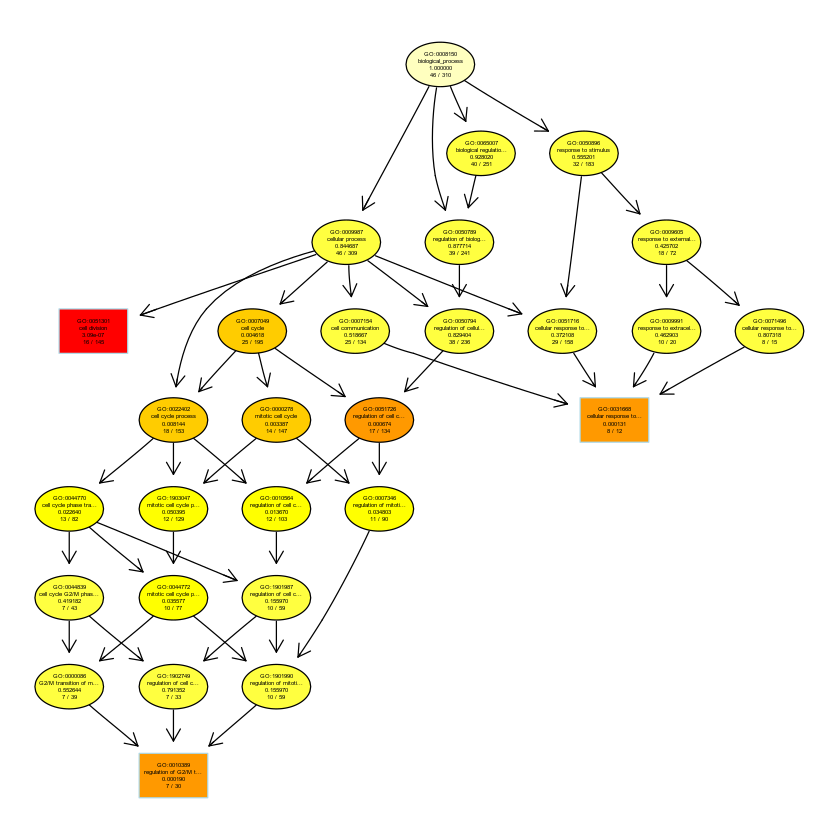

In [42]:
showSigOfNodes(sampleGOdata,
               score(resultKS.elim),
               firstSigNodes = 3, useInfo ='all')